In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.optimize import brenth,newton
from scipy import integrate
from scipy import interpolate

In [2]:
def fcs_cond_probfct(I,I0,delta_t,w,D):
    a = w**2/2/D/delta_t
    return np.sqrt(a/np.pi)*I0**a*I**(a-1)*np.cosh(2*a*np.sqrt(np.log(I)*np.log(I0)))/np.sqrt(-np.log(I))

In [3]:
def fcs_cum_probfct(I,I0,delta_t,w,D,sample=0):
    a = w**2/2/D/delta_t
    return 0.5*(sf.erfc(a*(np.sqrt(-np.log(I))+np.sqrt(-np.log(I0))))+sf.erfc(a*(np.sqrt(-np.log(I))-np.sqrt(-np.log(I0)))))-sample

In [4]:
def fcs_cum_probfct_log(I,I0,delta_t,w,D,sample=1.0):
    a = w**2/2/D/delta_t
    return np.log(0.5*(sf.erfc(a*(np.sqrt(-np.log(I))+np.sqrt(-np.log(I0))))+sf.erfc(a*(np.sqrt(-np.log(I))-np.sqrt(-np.log(I0))))))-np.log(sample)

In [5]:
I = np.linspace(0,1,100)

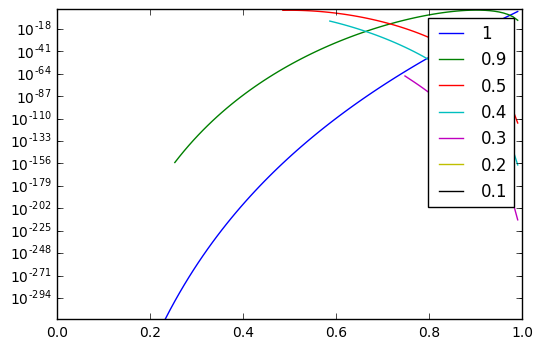

In [7]:
# these probability functions look very nice
delta_t = 0.01
w = 1.0
D = 1.0
sample_list=[1,0.9,0.5,0.4,0.3,0.2,0.1]
for sample in sample_list:
    plt.semilogy(I,fcs_cond_probfct(I,sample,delta_t,w,D),label=str(sample))
plt.legend()

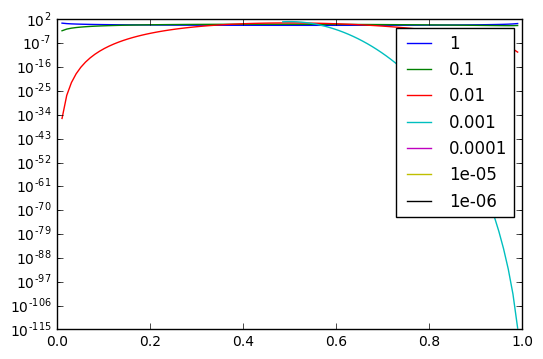

In [10]:
# these probability functions look very nice
w = 1.0
D = 1.0
I0=0.5
dt_list=[1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
for dt in dt_list:
    plt.semilogy(I,fcs_cond_probfct(I,I0,dt,w,D),label=str(dt))
plt.legend()

In [18]:
print(fcs_cond_probfct(I,I0,0.0001,w,D))

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


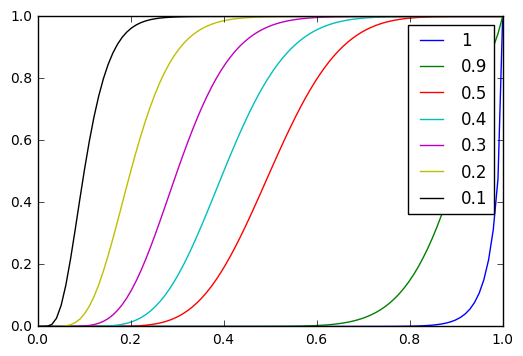

In [17]:
# these probability functions look very nice
delta_t = 0.1
w = 1.0
D = 1.0
sample_list=[1,0.9,0.5,0.4,0.3,0.2,0.1]
for sample in sample_list:
    plt.plot(I,fcs_cum_probfct(I,sample,delta_t,w,D),label=str(sample))
plt.legend()

In [65]:
# lets sample in real space
Intensity=[0.5]

N = 100000
sample_array=np.random.random_sample(N)

delta_t = 0.1
D = 1.0
w = 3.0
for sample in sample_array:
    int_sample = brenth(f=fcs_cum_probfct,a=0,b=1,args=(Intensity[-1],delta_t,w,D,sample))
#    print(int_sample)
    Intensity.append(int_sample)
    

In [50]:
# lets sample in log space
Intensity_log=[-0.4]

N = 10
sample_array=np.random.random_sample(N)

delta_t = 0.1
D = 1.0
w = 1.0
for sample in sample_array:
    print(sample,np.log(sample))
    log_sample = newton(func=fcs_cum_probfct_log,x0=Intensity_log[-1],args=(Intensity_log[-1],delta_t,w,D,sample))
    print(log_sample)
    Intensity_log.append(log_sample)



0.374794794097 -0.98137661853


RuntimeError: Failed to converge after 50 iterations, value is nan

0.0693578978395
[ 0.5         0.50800758  0.52092206 ...,  0.          0.          0.        ]


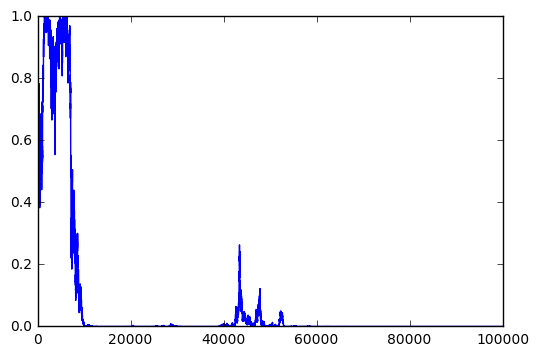

In [66]:
Intensity = np.array(Intensity)
plt.plot(Intensity)
print(Intensity.mean())
print(Intensity)

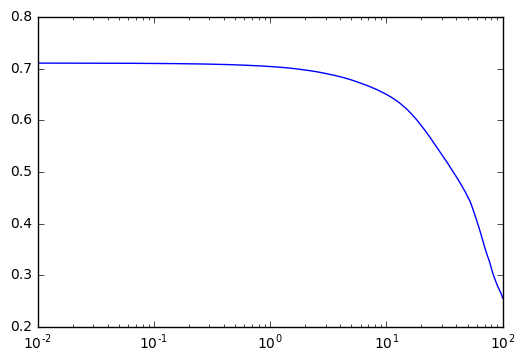

In [58]:
f = np.fft.rfft(Intensity)
acf = np.fft.irfft(f * np.conjugate(f))
acf = np.fft.fftshift(acf) / N
autocorr = acf[int(N/2):]/Intensity.mean()**2

autocorr = autocorr[:10000]-1.0
t = np.arange(0,autocorr.size)*delta_t
plt.semilogx(t,autocorr)